[Plots.jl] Switched to backend: qwt

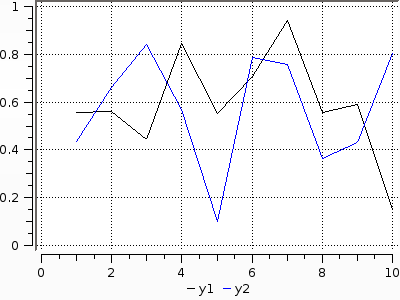

In [15]:
using Plots; qwt!()
p = plot(rand(10,2), size=(400,300))

In [17]:
p.o.lines[1]

Series{axis=left label=y1 idx=1 npoints=10}

In [1]:
using Plots; qwt!()
plotDefault!(:size, (500,300));

INFO: Recompiling stale cache file /home/tom/.julia/lib/v0.4/Plots.ji for module Plots.


[Plots.jl] Default backend: immerse
[Plots.jl] Switched to backend: qwt


In [5]:
# a couple things are happening here... we're pushing new 
# data to our series, and redrawing with gui()
function add_to_plot(plt, rng)
    for x in rng
        push!(plt, x, [randn(), sin(x)])
    end
    gui()
end

function run_push_test(batchsize, numbatch)
    fullrng = linspace(0.2, 2π, numbatch+1)
    println("Testing batchsize=$batchsize numbatch=$numbatch points")
    plt = plot([0,0.1], Any[randn(2),sin], t=[:sticks,:path], w=2)
    
    allms = Float64[]
    for i in 1:numbatch
        rng = linspace(fullrng[i], fullrng[i+1], batchsize)
        t = @elapsed add_to_plot(plt, rng)
        millis = 1000*t
        push!(allms, millis)
        # @printf "Millis per update: %1.3f\n" millis
    end
    allms
end

run_push_test (generic function with 1 method)

In [8]:
batchsize, numbatch = 500, 500
ms = run_push_test(batchsize, numbatch);

Testing batchsize=500 numbatch=500 points


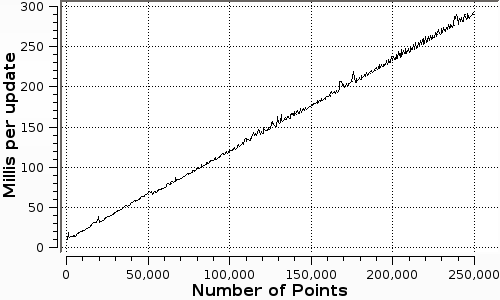

In [9]:
plot((1:numbatch)*batchsize, ms, xlab="Number of Points", ylab="Millis per update", leg=false)

## Example: add to a plot different ways

In [ ]:
plt = plot(rand(10,2))

In [ ]:
# append 3 points to the second series
append!(plt, 2,rand(3))

In [ ]:
# pushing a vector will add one to each series
for i in 1:100
    push!(plt, rand(2))
end
plt

## Example: line styles 

[Plots.jl] Switched to backend: gadfly

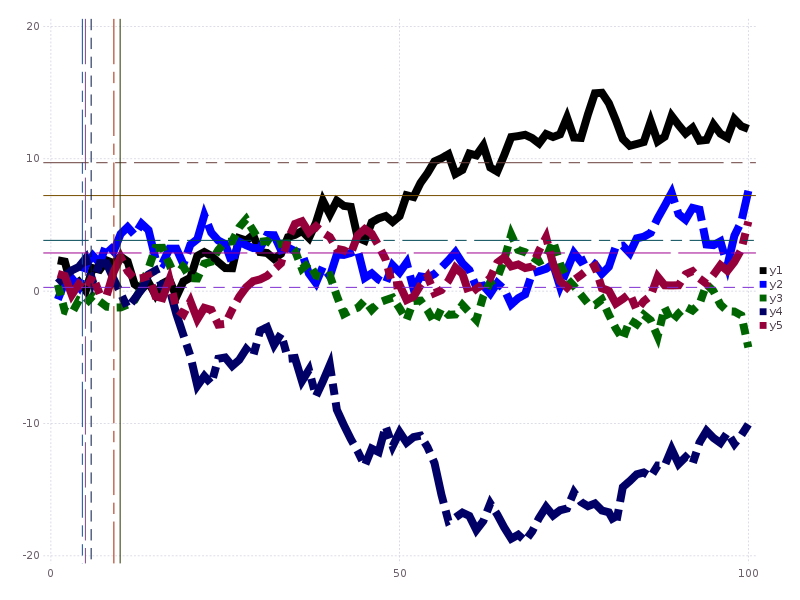

In [12]:
using Plots; gadfly!()
plot(cumsum(randn(100,5),1), w=8, style=:auto)
plot!(rand(1,10)*10, style=:auto, t=[:hline,:vline])